[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/AmirMardan/deep-learning-algorithms/blob/main/1_img_segmentation/1_unet_carvana/run_colab.ipynb)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
project_path = "/content/drive/MyDrive/Colab/unet/1_unet_carvana/"
import sys
sys.path.append(project_path)

In [3]:
from unet import UNet
import matplotlib.pyplot as plt 
import torch
import pandas as pd
import tools
import torch 
import matplotlib.pyplot as plt
from default_values import *


In [4]:
!bash {project_path + "data_scripts/download_data.sh"}  


In [5]:
data_dir = "/content/data/carvana"
!python {project_path + "train.py --epochs 4 --data_dir " + data_dir}

100% 287/287 [04:55<00:00,  1.03s/it, loss=0.0301]
Got 19241556/19507200 with accuracy 98.64
Dice score: 0.9680459499359131
Epoch: 1 -> loss: 0.0899474821491524
100% 287/287 [04:43<00:00,  1.01it/s, loss=0.0255]
== Checkpoint is saved! ==
Got 19308717/19507200 with accuracy 98.98
Dice score: 0.9760038256645203
Epoch: 2 -> loss: 0.02966892146197138
100% 287/287 [04:35<00:00,  1.04it/s, loss=0.0188]
Got 19314114/19507200 with accuracy 99.01
Dice score: 0.9769940972328186
Epoch: 3 -> loss: 0.025530980270394882
100% 287/287 [04:34<00:00,  1.04it/s, loss=0.0187]
== Checkpoint is saved! ==
Got 19330657/19507200 with accuracy 99.09
Dice score: 0.9789019823074341
Epoch: 4 -> loss: 0.02285424817210706


In [6]:
metrics = pd.read_csv(project_path +"/checkpoints/metrics.csv")

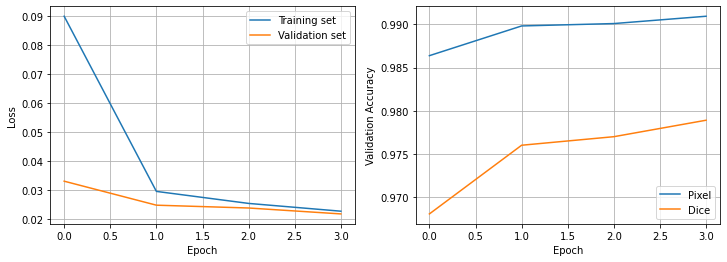

In [7]:
fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(121)
ax.plot(metrics.train_loss, label="Training set")
ax.plot(metrics.valid_loss, label="Validation set")
ax.grid()
ax.set_ylabel("Loss")
ax.set_xlabel("Epoch")
plt.legend()

ax = fig.add_subplot(122)
ax.plot(metrics.pixel_accuracy, label="Pixel")
ax.plot(metrics.dice_accuracy, label="Dice")
ax.set_ylabel("Validation Accuracy")
ax.set_xlabel("Epoch")
ax.grid()
leg = plt.legend()

# ax = fig.add_subplot(133)
# ax.plot(metrics.learning_rate)
# ax.set_ylabel("Learning Rate")
# ax.set_xlabel("Epoch")
# ax.grid()


In [8]:
unet = UNet(N_CHANNELS, N_CLASSES,
            FEATURES, False)

tools.load_checkpoint(unet,
                      file=project_path +"/checkpoints/checkpoint_4.tar",
                      device=DEVICE)

== Checkpoint is loaded! ==


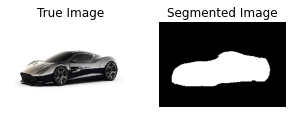

In [10]:
test_dir = project_path + "/results/test"
img_path= test_dir + "/test.png"

tools.show_test(img_path, unet,
                IMAGE_HEIGHT, IMAGE_WIDTH,
                DEVICE)

It seems the model could do a good sementation.
However, almost all used images in this study had a white background. 
This means, the accuracy should be low if we use this model to segment an image with not-white background.

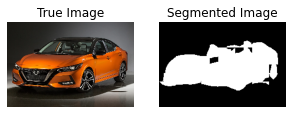

In [11]:
img_path= test_dir + "/test1.png"

tools.show_test(img_path, unet,
                IMAGE_HEIGHT, IMAGE_WIDTH,
                DEVICE)

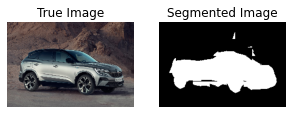

In [12]:
img_path= test_dir + "/test2.png"

tools.show_test(img_path, unet,
                IMAGE_HEIGHT, IMAGE_WIDTH,
                DEVICE)

In [ ]:
img_path= test_dir + "/test2.png"

tools.show_test(img_path, unet,
                IMAGE_HEIGHT, IMAGE_WIDTH,
                DEVICE)